In [1]:
import json
import ijson
import logging

import numpy as np

from decimal import Decimal
from pathlib import Path
from typing import List, Tuple

from src.utils.data import *
from src.utils.plots import *
from src.utils.sampling import *
from src.utils.memory_management import *
from src.utils.statistics_utils import *

Setting up Logger

In [2]:
# Set up logger
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

# Create a console handler
sh = logging.StreamHandler()
sh.setLevel(logging.INFO)
# Add the handler to the logger
logger.addHandler(sh)

Loading the `ConfigParser` for paths

In [3]:
from src.configs.config_parser import PathConfigParser, data_config_file, project_root

# Configs Directory
parser = PathConfigParser(str(data_config_file))
parser.load()

In [4]:
# Data Paths
PROCESSED_DATA_PATH = project_root / parser.get("data_paths", {}).get("processed_data")
GE_PATH = parser.get("data_paths", {}).get("brain_regions_genes_ge")
PROCESSED_DONORS_GE_PATH = PROCESSED_DATA_PATH / GE_PATH

# Donors_ids
DONORS_IDS = parser.get("donors_ids")

Loading the Meta Donor DataFrame

In [5]:
meta_donor_csv_pth = PROCESSED_DONORS_GE_PATH / Path("meta_donor.csv")
meta_donor_df = load_df_from_csv(meta_donor_csv_pth)
meta_donor_df.head(3)

,brain_region,gene_id,gene_expression_values
0,4012,2,"[1.58747780630413, 7.567907786636231, 1.495682..."
1,4012,3,"[5.11909080343638, 9.66921569197332, 10.081154..."
2,4012,6,"[1.83564765363665, 1.4949501777457102, 5.94151..."


Converting the gene_expression_values from a stored string to a list

In [6]:
meta_donor_df["gene_expression_values"]=meta_donor_df["gene_expression_values"].apply(json.loads)
logger.info(meta_donor_df["gene_expression_values"][0][0])

1.58747780630413


In [7]:
geneid_H0 = calculate_gene_mean_expression_values(meta_donor_df)

logger.info(geneid_H0.head(5))
logger.info(f"Number of Total Sample Count == {geneid_H0['total_sample_count'].sum() == get_total_number_of_samples(meta_donor_df)}")

   gene_id  total_expression  total_sample_count  weighted_mean
0        2      16227.834876                3936       4.122926
1        3      66283.660534                7872       8.420180
2        6      41203.873837               13776       2.990990
3        7      19101.630752                3936       4.853057
4        9      21518.755199                7872       2.733582
Number of Total Sample Count == True


Histogram of Mean Expression Values per Gene

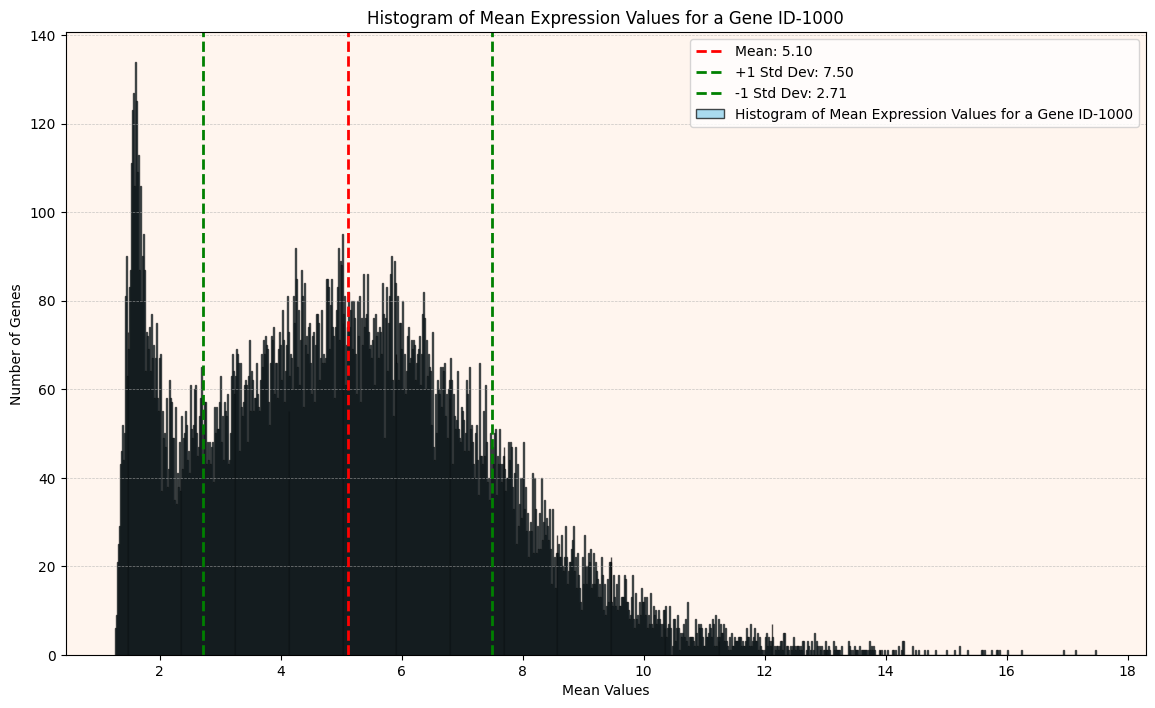

In [11]:
plot_histogram(geneid_H0["weighted_mean"], plot_title="Histogram of Mean Expression Values for a Gene ID-1000", 
               x_title="Mean Values", y_title="Number of Genes", bins=1000, save=True)